<a href="https://colab.research.google.com/github/namfamishere/techcombank-stock-price-prediction/blob/main/tcb_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Spark

In [12]:
cd/content/drive/MyDrive/spark

/content/drive/MyDrive/spark


In [13]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [87.8 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,905 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [

In [14]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/MyDrive/spark/spark-3.3.0-bin-hadoop3"

import findspark
findspark.init()
findspark.find()


'/content/drive/MyDrive/spark/spark-3.3.0-bin-hadoop3'

In [17]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("StockMarket")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [18]:
spark

Create public URL for the UI page for Spark UI

In [25]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2022-07-31 12:26:46--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.19M  49.0MB/s    in 0.3s    

2022-07-31 12:26:46 (49.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 7
error:  invalid response [7]
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [27]:
!./ngrok authtoken 2CdF7gVNlyMHcpH9wMymZ6OANI8_6ijVA8o4TiZUyvbFH9KKx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [31]:
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c   "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [29]:
get_ipython().system_raw('./ngrok http 4050 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


# Dataset Exploration

In [32]:
df_aapl = spark.read.csv("/content/drive/MyDrive/techcombank-stock-price-prediction/AAPL.csv",header=True, inferSchema=True)

In [34]:
df_aapl.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [35]:
df_aapl.show()

+-------------------+--------+--------+--------+--------+---------+----------+
|               Date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+-------------------+--------+--------+--------+--------+---------+----------+
|2000-01-03 00:00:00|0.936384|1.004464|0.907924|0.999442| 0.854541| 535796800|
|2000-01-04 00:00:00|0.966518|0.987723| 0.90346|0.915179| 0.782494| 512377600|
|2000-01-05 00:00:00|0.926339|0.987165|0.919643|0.928571| 0.793945| 778321600|
|2000-01-06 00:00:00|0.947545|0.955357|0.848214|0.848214| 0.725238| 767972800|
|2000-01-07 00:00:00|0.861607|0.901786|0.852679|0.888393| 0.759592| 460734400|
|2000-01-10 00:00:00|0.910714|0.912946|0.845982|0.872768| 0.746232| 505064000|
|2000-01-11 00:00:00|0.856585|0.887277|0.808036|0.828125| 0.708062| 441548800|
|2000-01-12 00:00:00|0.848214|0.852679|0.772321| 0.77846| 0.665597| 976068800|
|2000-01-13 00:00:00| 0.84361|0.881696|0.825893|0.863839| 0.738598|1032684800|
|2000-01-14 00:00:00|0.892857|0.912946|0.887277|0.89

In [36]:
df_aapl.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|              Volume|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|              5679|              5679|              5679|              5679|              5679|                5679|
|   mean|27.655528886599782| 27.96333620250042|27.351974223806995| 27.67022892181725|26.546330152491617| 4.206504023208311E8|
| stddev| 40.17574060418408|40.662065532700915| 39.70804718079798|40.207648284507734| 40.12057575133881|3.8801818393992686E8|
|    min|          0.231964|          0.235536|          0.227143|          0.234286|          0.200319|            39340000|
|    max|        182.630005|        182.940002|        179.119995|        182.009995|        181.511703|          7421

In [37]:
import pyspark.sql.functions as f
df_aapl = df_aapl.withColumn("date", f.to_date('Date'))

In [38]:
df_aapl.show()

+----------+--------+--------+--------+--------+---------+----------+
|      date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+----------+--------+--------+--------+--------+---------+----------+
|2000-01-03|0.936384|1.004464|0.907924|0.999442| 0.854541| 535796800|
|2000-01-04|0.966518|0.987723| 0.90346|0.915179| 0.782494| 512377600|
|2000-01-05|0.926339|0.987165|0.919643|0.928571| 0.793945| 778321600|
|2000-01-06|0.947545|0.955357|0.848214|0.848214| 0.725238| 767972800|
|2000-01-07|0.861607|0.901786|0.852679|0.888393| 0.759592| 460734400|
|2000-01-10|0.910714|0.912946|0.845982|0.872768| 0.746232| 505064000|
|2000-01-11|0.856585|0.887277|0.808036|0.828125| 0.708062| 441548800|
|2000-01-12|0.848214|0.852679|0.772321| 0.77846| 0.665597| 976068800|
|2000-01-13| 0.84361|0.881696|0.825893|0.863839| 0.738598|1032684800|
|2000-01-14|0.892857|0.912946|0.887277|0.896763| 0.766748| 390376000|
|2000-01-18|0.901786|0.946429|0.896763|0.928013| 0.793468| 459177600|
|2000-01-19| 0.94308

In [39]:
date_breakdown = ['year', 'month', 'day']
for i in enumerate(date_breakdown):
    index = i[0]
    print(index)
    name = i[1]
    print(name)
    df_aapl = df_aapl.withColumn(name, f.split('date', '-')[index])

0
year
1
month
2
day


In [40]:
df_aapl.show(5)

+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|year|month|day|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|2000-01-03|0.936384|1.004464|0.907924|0.999442| 0.854541|535796800|2000|   01| 03|
|2000-01-04|0.966518|0.987723| 0.90346|0.915179| 0.782494|512377600|2000|   01| 04|
|2000-01-05|0.926339|0.987165|0.919643|0.928571| 0.793945|778321600|2000|   01| 05|
|2000-01-06|0.947545|0.955357|0.848214|0.848214| 0.725238|767972800|2000|   01| 06|
|2000-01-07|0.861607|0.901786|0.852679|0.888393| 0.759592|460734400|2000|   01| 07|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
only showing top 5 rows



In [41]:
df_aapl_plot = df_aapl.select('year', 'Close').toPandas()

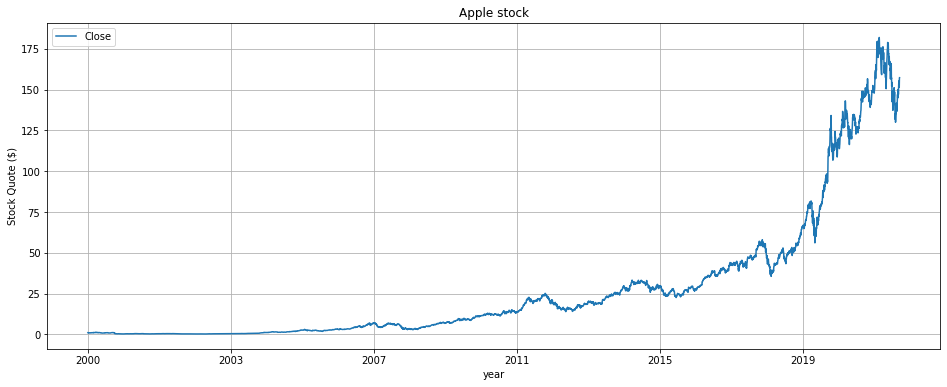

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline

df_aapl_plot.set_index('year', inplace=True)
df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple stock')
plt.ylabel('Stock Quote ($)')
plt.show()

## With TCB

PySpark Data Frame: https://builtin.com/data-science/pyspark-dataframe

In [ ]:
df_tcb = spark.read.csv("/content/drive/MyDrive/techcombank-stock-price-prediction/TCB Historical Data.csv",header=True, inferSchema=True)

In [ ]:
df_tcb.printSchema()

In [ ]:
from pyspark.sql.types import *

In [ ]:
df_tcb1 = df_tcb.withColumn("Price", f.col("Price").cast(
  DoubleType()))

In [ ]:
df_tcb.show(5)

In [ ]:
price1 = "37,300.0"
price1.replace(",", ".").replace(".0", "")

In [ ]:
df_tcb_pd = df_tcb.toPandas()
df_tcb_pd

In [ ]:
df_tcb_pd.dtypes

# Preparing data

In [43]:
df_aapl.toPandas().shape

(5679, 10)

In [44]:
df_aapl.dropna().count()

5679

In [45]:
df_aapl.select('Open', "High", 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              5679|              5679|              5679|              5679|              5679|
|   mean|27.655528886599782| 27.96333620250042|27.351974223806995| 27.67022892181725|26.546330152491617|
| stddev| 40.17574060418408|40.662065532700915| 39.70804718079798|40.207648284507734| 40.12057575133881|
|    min|          0.231964|          0.235536|          0.227143|          0.234286|          0.200319|
|    max|        182.630005|        182.940002|        179.119995|        182.009995|        181.511703|
+-------+------------------+------------------+------------------+------------------+------------------+



1. Group the year column by `Adj Close` count:

In [46]:
df_aapl.groupBy(['year']).agg({'Adj Close':'count'})\
     .withColumnRenamed('count(Adj Close)', 'Row Count')\
     .orderBy(["year"],ascending=False)\
     .show()

+----+---------+
|year|Row Count|
+----+---------+
|2022|      143|
|2021|      252|
|2020|      253|
|2019|      252|
|2018|      251|
|2017|      251|
|2016|      252|
|2015|      252|
|2014|      252|
|2013|      252|
|2012|      250|
|2011|      252|
|2010|      252|
|2009|      252|
|2008|      253|
|2007|      251|
|2006|      251|
|2005|      252|
|2004|      252|
|2003|      252|
+----+---------+
only showing top 20 rows



2. Create new dataframes for training and test purposes:

Use all of the stock quotes from 2000 through 2016 to predict stock trends in 2017-2022



In [47]:
train_df_aapl = df_aapl[df_aapl.year < 2017]
test_df_aapl = df_aapl[df_aapl.year > 2016]

3. Get row and column counts of 2 data frames

In [48]:
print(train_df_aapl.toPandas().shape)
test_df_aapl.toPandas().shape

(4277, 10)


(1402, 10)

4. Visualizes `train_df_aapl` and `test_df_aapl`

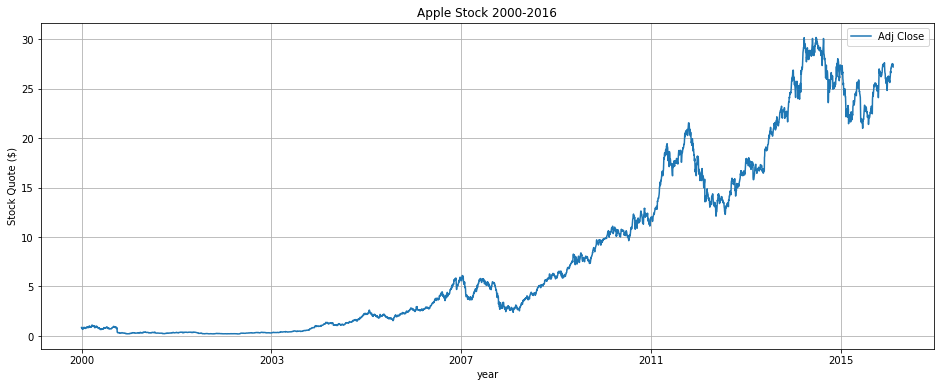

In [49]:
train_df_aapl_plot = train_df_aapl.select('year', 'Adj Close').toPandas()
train_df_aapl_plot.set_index('year', inplace=True)
train_df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2000-2016')
plt.ylabel('Stock Quote ($)')
plt.show()

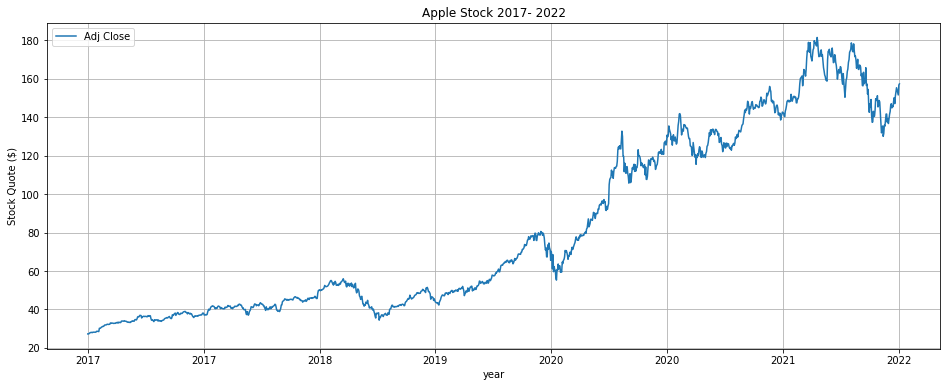

In [50]:
test_df_aapl_plot = test_df_aapl.select('year', 'Adj Close').toPandas()
test_df_aapl_plot.set_index('year', inplace=True)
test_df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2017- 2022')
plt.ylabel('Stock Quote ($)')
plt.show()

5. Create 2 arrays: train_array, test_array

In [51]:
trainDF = train_df_aapl
testDF = test_df_aapl

In [52]:
import numpy as np
trainArray = np.array(trainDF.select('Open', 'High', 'Low',                     'Close','Volume', 'Adj Close' ).collect())
testArray = np.array(testDF.select('Open', 'High', 'Low', 'Close','Volume',     'Adj Close' ).collect())

6. Scale the arrays between 0 and 1

In [53]:
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()

In [54]:
minMaxScale.fit(trainArray)

testingArray = minMaxScale.transform(testArray)
trainingArray = minMaxScale.transform(trainArray)

In [55]:
xtrain = trainingArray[:, 0:-1]
xtest = testingArray[:, 0:-1]
ytrain = trainingArray[:, -1:]
ytest = testingArray[:, -1:]

In [56]:
print('xtrain shape = {}'.format(xtrain.shape))
print('xtest shape = {}'.format(xtest.shape))
print('ytrain shape = {}'.format(ytrain.shape))
print('ytest shape = {}'.format(ytest.shape))

xtrain shape = (4277, 5)
xtest shape = (1402, 5)
ytrain shape = (4277, 1)
ytest shape = (1402, 1)


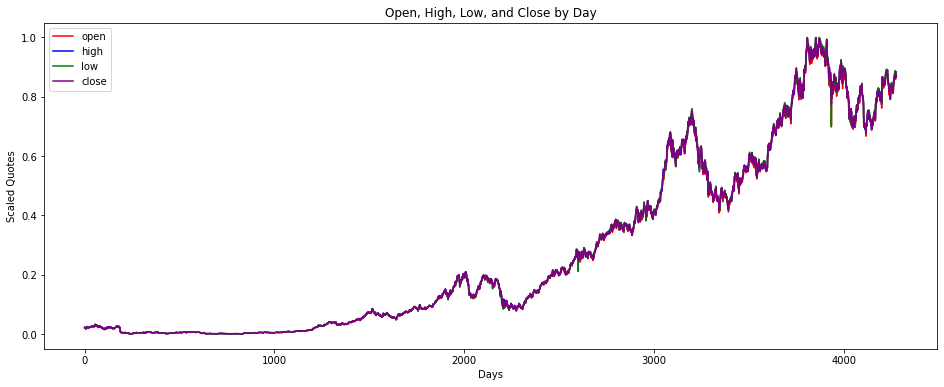

In [57]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,0],color='red', label='open')
plt.plot(xtrain[:,1],color='blue', label='high')
plt.plot(xtrain[:,2],color='green', label='low')
plt.plot(xtrain[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

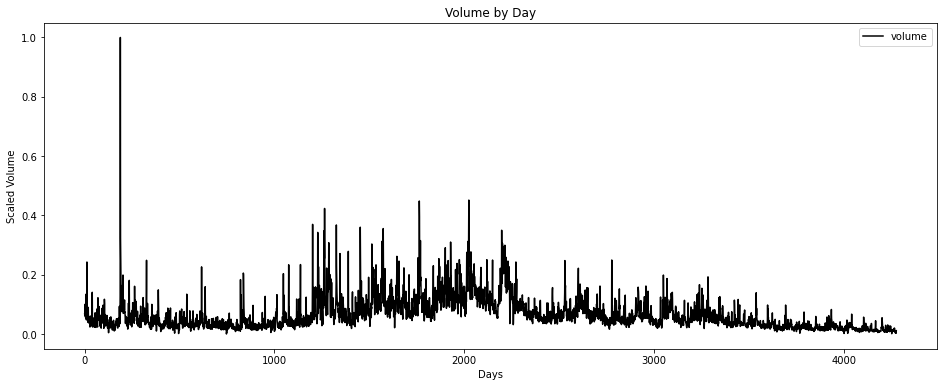

In [58]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,4],color='black', label='volume')
plt.legend(loc = 'upper right')
plt.title('Volume by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Volume')
plt.show()

# Building LSTM model

In [59]:
from keras import models, layers

In [60]:
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1,5)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

In [ ]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=100)

In [69]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=500)

428/428 [==============================] - 3s 6ms/step - loss: 6.4290e-05
Epoch 139/500
428/428 [==============================] - 1s 3ms/step - loss: 6.5956e-05
Epoch 140/500
428/428 [==============================] - 1s 3ms/step - loss: 6.4264e-05
Epoch 141/500
428/428 [==============================] - 1s 3ms/step - loss: 6.3325e-05
Epoch 142/500
428/428 [==============================] - 1s 3ms/step - loss: 6.3123e-05
Epoch 143/500
428/428 [==============================] - 1s 3ms/step - loss: 6.8145e-05
Epoch 144/500
428/428 [==============================] - 1s 3ms/step - loss: 6.4301e-05
Epoch 145/500
428/428 [==============================] - 2s 4ms/step - loss: 6.4869e-05
Epoch 146/500
428/428 [==============================] - 2s 4ms/step - loss: 6.7813e-05
Epoch 147/500
428/428 [==============================] - 1s 3ms/step - loss: 6.6612e-05
Epoch 148/500
428/428 [==============================] - 1s 3ms/step - loss: 6.4185e-05
Epoch 149/500
428/428 [=======================

In [70]:
predicted = model.predict(xtest)

In [71]:
combined_array = np.concatenate((ytest, predicted), axis = 1)

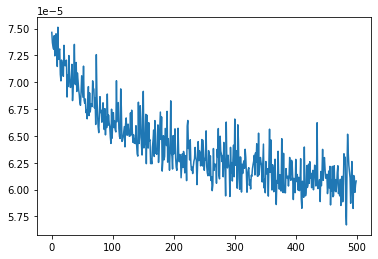

In [72]:
plt.plot(loss.history['loss'], label='loss')
plt.show()

# Evaluate the model

In [66]:
import sklearn.metrics as metrics

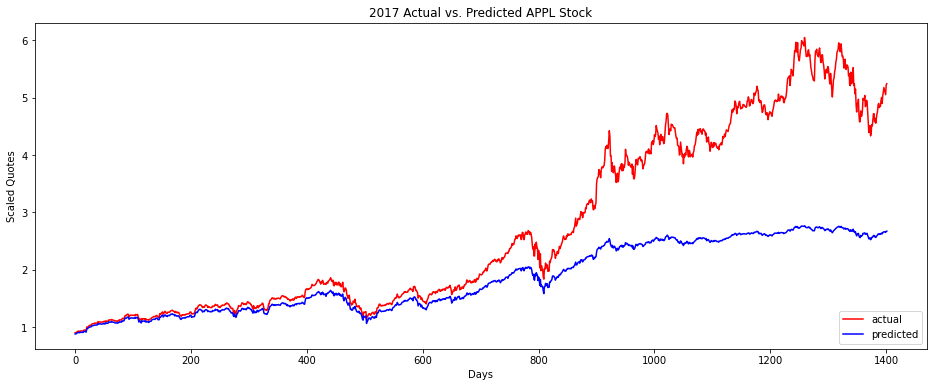

In [73]:
plt.figure(figsize=(16,6))
plt.plot(combined_array[:,0],color='red', label='actual')
plt.plot(combined_array[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('2017 Actual vs. Predicted APPL Stock')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

In [74]:
np.sqrt(metrics.mean_squared_error(ytest,predicted))

1.3183237424011816